In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

sns.set_style('darkgrid')
np.set_printoptions(precision=2)
warnings.filterwarnings("ignore")


from sklearn.preprocessing import OneHotEncoder, LabelEncoder, PowerTransformer
from sklearn.impute import SimpleImputer, KNNImputer

from sklearn.feature_selection import SelectKBest, chi2, RFE
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.decomposition import PCA

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score

from sklearn.model_selection import KFold, ShuffleSplit, LeaveOneOut, StratifiedKFold
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
""" Semilla """
seed = 99


## Primero cargamos la base de datos Saheart
# Obtén el directorio actual del script o cuaderno
# Define el nombre del archivo CSV



#df = pd.read_csv("c:/Users/dagom/Documents/docencia/DOCENCIA_FINAL_2023_PHYTON_ML_DANI/2_Introduccion_y_SVM/SAheart.csv", sep=",", decimal=".")
df = pd.read_csv("SAheart.csv", sep=",", decimal=".")

df.head()
df.describe()
#df.quantile(np.arange(0,1,0.1))
variables = df.columns.values



In [5]:
display(df.describe())

sbp     tobacco         ldl   adiposity       typea     obesity  \
count  462.000000  462.000000  462.000000  462.000000  462.000000  462.000000   
mean   138.326840    3.635649    4.740325   25.406732   53.103896   26.044113   
std     20.496317    4.593024    2.070909    7.780699    9.817534    4.213680   
min    101.000000    0.000000    0.980000    6.740000   13.000000   14.700000   
25%    124.000000    0.052500    3.282500   19.775000   47.000000   22.985000   
50%    134.000000    2.000000    4.340000   26.115000   53.000000   25.805000   
75%    148.000000    5.500000    5.790000   31.227500   60.000000   28.497500   
max    218.000000   31.200000   15.330000   42.490000   78.000000   46.580000   

          alcohol         age  
count  462.000000  462.000000  
mean    17.044394   42.816017  
std     24.481059   14.608956  
min      0.000000   15.000000  
25%      0.510000   31.000000  
50%      7.510000   45.000000  
75%     23.892500   55.000000  
max    147.190000   64.000000

In [ ]:
## una pequeña visualizacion
import seaborn as sns
sns.pairplot(df, hue="chd",palette="bright")


### Importante que el SVM no funciona bien ni con missing ni con valores no estandarizados

## Paso 1. vemos cuantos missing tenemos en cada variable ##
df.isnull().sum()



Output hidden; open in https://colab.research.google.com to view.

In [6]:
## Paso 2. estandarizar
from sklearn import preprocessing

col_cat = df[['famhist', 'chd']]
col_num = df[['sbp', 'tobacco', 'ldl', 'adiposity', 'typea', 'obesity', 'alcohol', 'age']]


### TIPIFICAMOS O COMO DICEN LOS MODERNOS STANDARIZAMOS.....
scaler = preprocessing.StandardScaler().fit(col_num)
col_num_standarizada = scaler.transform(col_num)

col_num_standarizada.mean(axis=0)
col_num_standarizada.std(axis=0)

col_num_standarizada = pd.DataFrame(col_num_standarizada)


df_depurada = pd.concat([col_num_standarizada, col_cat],  axis=1) ## aunque asi se pierden los nombres de las variables

## recuperamos los nombres y tenemos  nuestra base de datos depurada
df_depurada=df_depurada.set_axis(['sbp', 'tobacco', 'ldl', 'adiposity', 'typea', 'obesity', 'alcohol', 'age','famhist', 'chd'], axis=1)
display(df_depurada.head())


sbp   tobacco       ldl  adiposity     typea   obesity   alcohol  \
0  1.058564  1.823073  0.478412  -0.295503 -0.418470 -0.176786  3.277738   
1  0.277089 -0.790237 -0.159680   0.412140  0.193344  0.671373 -0.612745   
2 -0.992806 -0.774980 -0.609245   0.884332 -0.112563  0.735519 -0.541183   
3  1.546985  0.842264  0.807126   1.624141 -0.214532  1.412621  0.295062   
4 -0.211332  2.171805 -0.599577   0.305351  0.703189 -0.012856  1.647775   

        age  famhist chd  
0  0.629336  Present  Si  
1  1.383115   Absent  Si  
2  0.218184  Present  No  
3  1.040488  Present  Si  
4  0.423760  Present  Si

In [ ]:
sns.pairplot(df_depurada, hue="chd",palette="bright")


Output hidden; open in https://colab.research.google.com to view.

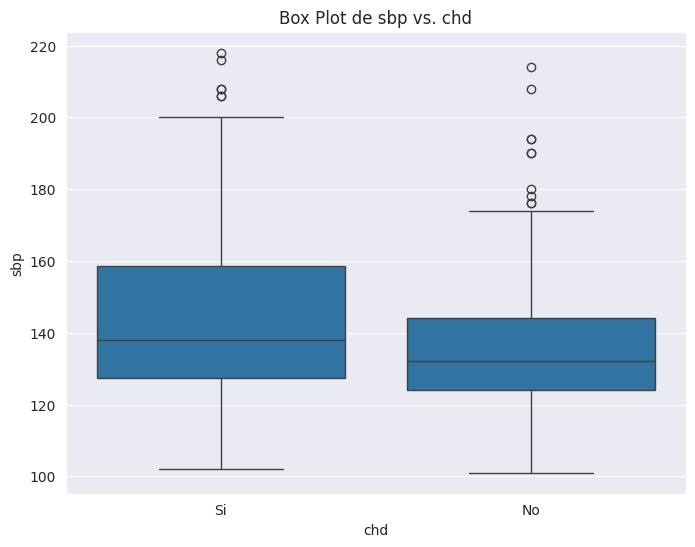

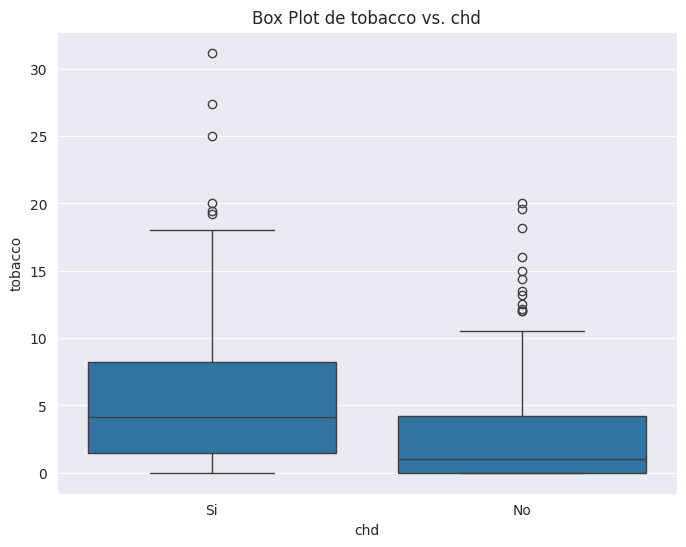

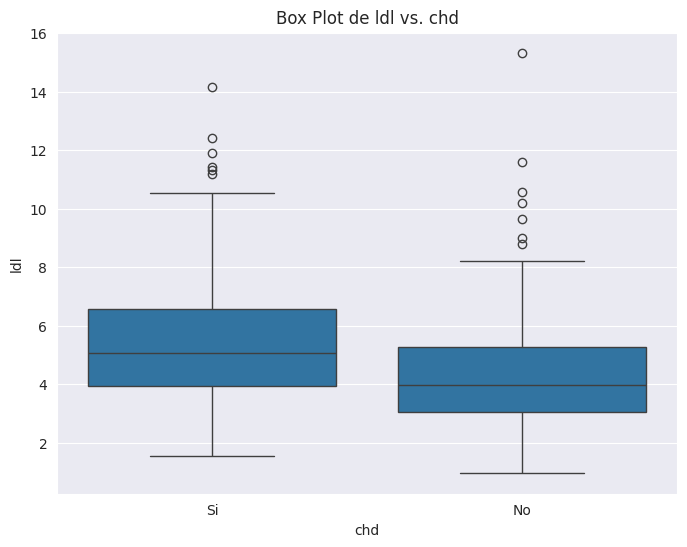

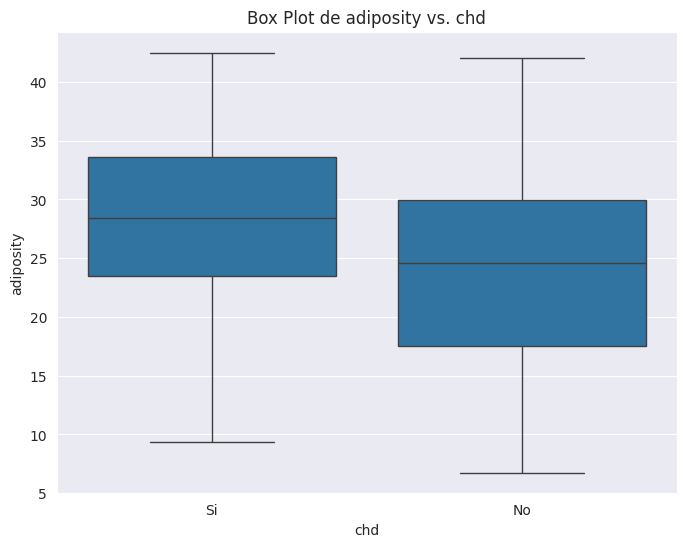

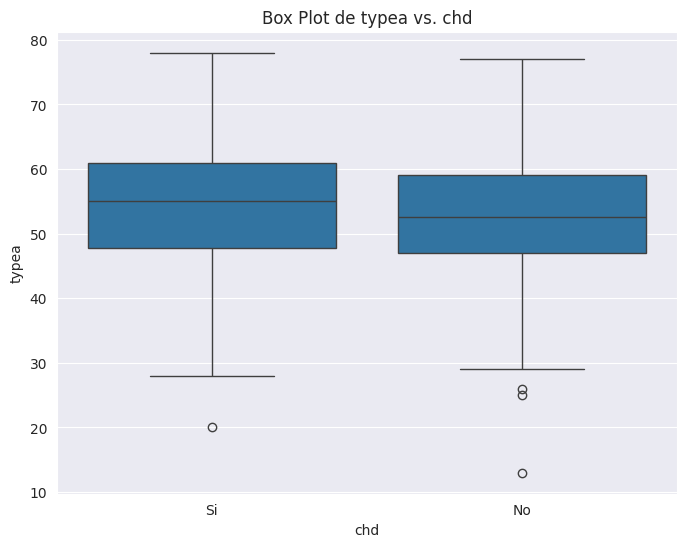

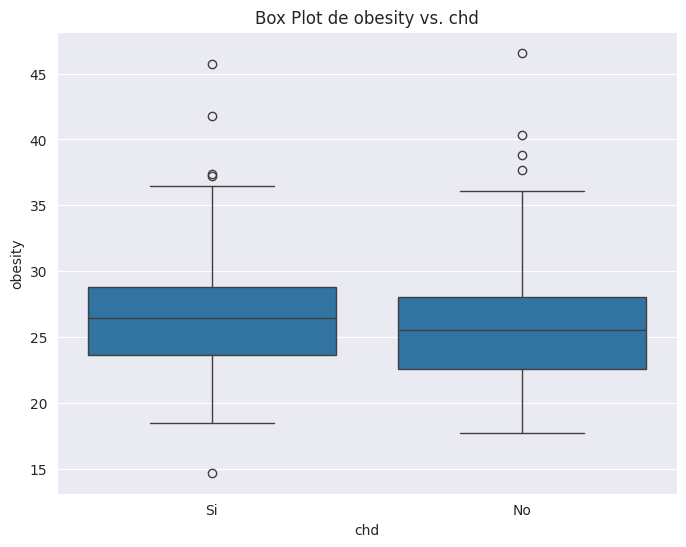

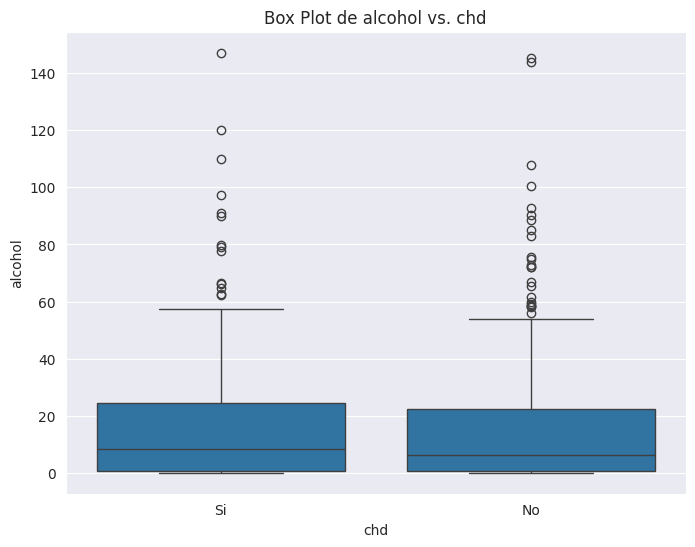

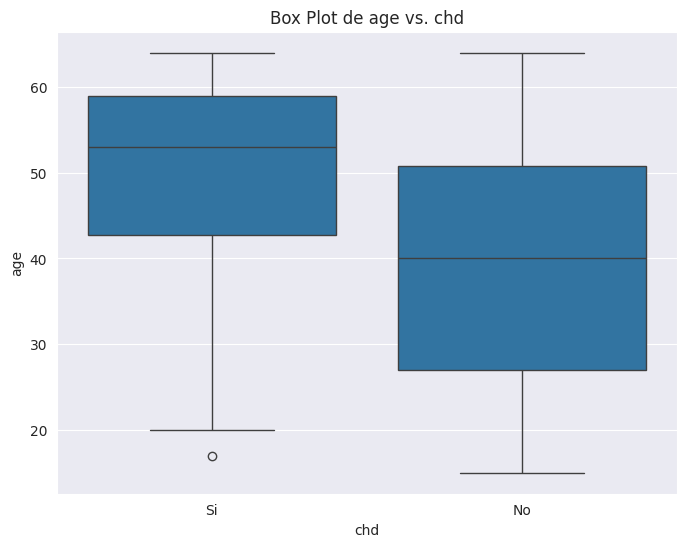

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar las columnas cuantitativas y 'chd'
cols_cuantitativas = ['sbp', 'tobacco', 'ldl', 'adiposity', 'typea', 'obesity', 'alcohol', 'age']
data_boxplot = df[['chd'] + cols_cuantitativas]

# Crear un box plot para cada variable cuantitativa
for col in cols_cuantitativas:
  plt.figure(figsize=(8, 6))  # Ajustar tamaño de la figura
  sns.boxplot(x='chd', y=col, data=data_boxplot)
  plt.title(f'Box Plot de {col} vs. chd')
  plt.show()

In [7]:

## Paso 3. Variables categoricas las pasamos a dummies

df_depurada_dummies = pd.get_dummies(df_depurada,columns=['famhist'], drop_first= True)
df_depurada_dummies.head()

#df_depurada_dummies.to_csv('C:/Users/user.DESKTOP-EHHFBKM/Desktop/DOCENCIA_ESCRITORIO/0_Master_SVM_phyton/ML_en_phyton_2023_dani-20230414T084246Z-001/ML_en_phyton_2023_dani/SAheartbis.csv')


## YA YENEMOS NUESTRO DATASET OK PARA APLICAR SVM: SIN MISSING, ESCALADA Y CON DUMMIES...
X = df_depurada_dummies.drop('chd', axis=1)
y = df_depurada_dummies["chd"]

display(X.head())
display(y.head())

sbp   tobacco       ldl  adiposity     typea   obesity   alcohol  \
0  1.058564  1.823073  0.478412  -0.295503 -0.418470 -0.176786  3.277738   
1  0.277089 -0.790237 -0.159680   0.412140  0.193344  0.671373 -0.612745   
2 -0.992806 -0.774980 -0.609245   0.884332 -0.112563  0.735519 -0.541183   
3  1.546985  0.842264  0.807126   1.624141 -0.214532  1.412621  0.295062   
4 -0.211332  2.171805 -0.599577   0.305351  0.703189 -0.012856  1.647775   

        age  famhist_Present  
0  0.629336             True  
1  1.383115            False  
2  0.218184             True  
3  1.040488             True  
4  0.423760             True

0    Si
1    Si
2    No
3    Si
4    Si
Name: chd, dtype: object

In [8]:
## ojo por si quieremos tener 0 y 1 en lugar de true false etc etc

df_depurada_dummies['famhist_Present'] = df_depurada_dummies['famhist_Present'].astype(object)
df_depurada_dummies['famhist_Present'] = df_depurada_dummies['famhist_Present'].map({True: 1, False: 0, np.nan: 0}).astype(int)

df_depurada_dummies['chd'] = df_depurada_dummies['chd'].astype(object)
df_depurada_dummies['chd'] = df_depurada_dummies['chd'].map({'Si': 1, 'No': 0, np.nan: 0}).astype(int)

## YA YENEMOS NUESTRO DATASET OK PARA APLICAR SVM: SIN MISSING, ESCALADA Y CON DUMMIES...
X = df_depurada_dummies.drop('chd', axis=1)
y = df_depurada_dummies["chd"]

display(X.head())
display(y.head())

sbp   tobacco       ldl  adiposity     typea   obesity   alcohol  \
0  1.058564  1.823073  0.478412  -0.295503 -0.418470 -0.176786  3.277738   
1  0.277089 -0.790237 -0.159680   0.412140  0.193344  0.671373 -0.612745   
2 -0.992806 -0.774980 -0.609245   0.884332 -0.112563  0.735519 -0.541183   
3  1.546985  0.842264  0.807126   1.624141 -0.214532  1.412621  0.295062   
4 -0.211332  2.171805 -0.599577   0.305351  0.703189 -0.012856  1.647775   

        age  famhist_Present  
0  0.629336                1  
1  1.383115                0  
2  0.218184                1  
3  1.040488                1  
4  0.423760                1

0    1
1    1
2    0
3    1
4    1
Name: chd, dtype: int64

In [9]:
### emepzamos con el SVM
from sklearn.model_selection import GridSearchCV

print("Feature Variables: ")
print(df_depurada_dummies.info())

[X_train, X_test, y_train, y_test] = train_test_split(X, y, test_size = 0.30, random_state = 101)

tabla_target=pd.DataFrame(y_test.value_counts())

# train the model on train set
model = SVC(kernel='linear')
model.fit(X_train, y_train)


# print prediction results
predictions = model.predict(X_train)
print(classification_report(y_train, predictions))

cm = confusion_matrix(y_train, predictions)
print(cm)
accuracy=(cm[0,0]+cm[1,1])/(cm[0,1]+cm[1,1]+ cm[1,0]+cm[0,0])
print('accuracy' , accuracy)



# print prediction results
predictions = model.predict(X_test)
print(classification_report(y_test, predictions))

cm = confusion_matrix(y_test, predictions)
print(cm)
accuracy=(cm[0,0]+cm[1,1])/(cm[0,1]+cm[1,1]+ cm[1,0]+cm[0,0])
print('accuracy' , accuracy)


Feature Variables: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462 entries, 0 to 461
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sbp              462 non-null    float64
 1   tobacco          462 non-null    float64
 2   ldl              462 non-null    float64
 3   adiposity        462 non-null    float64
 4   typea            462 non-null    float64
 5   obesity          462 non-null    float64
 6   alcohol          462 non-null    float64
 7   age              462 non-null    float64
 8   chd              462 non-null    int64  
 9   famhist_Present  462 non-null    int64  
dtypes: float64(8), int64(2)
memory usage: 36.2 KB
None
              precision    recall  f1-score   support

           0       0.79      0.88      0.83       216
           1       0.69      0.51      0.59       107

    accuracy                           0.76       323
   macro avg       0.74      0.70      0.71      

In [ ]:
### validacion cruzada ###
from sklearn.model_selection import cross_val_score
results = cross_val_score(estimator=model, X=X, y=y, cv=5)
print(results)

[0.72 0.7  0.7  0.72 0.77]


In [10]:

## busqueda de parametros para el caso lineal ###
from sklearn.model_selection import GridSearchCV

# definimos los rangos de los parametros
param_grid_lineal = {'C': [0.1, 1, 2, 5, 10, 100] }

grid = GridSearchCV(SVC(kernel='linear'), param_grid_lineal, refit = True, cv=10, verbose = 1)

# ENTRENAMOS EN TRAIN Y BUSCAMOS EN TRAIN
resultados = grid.fit(X_train, y_train)

Fitting 10 folds for each of 6 candidates, totalling 60 fits


Fitting 10 folds for each of 6 candidates, totalling 60 fits


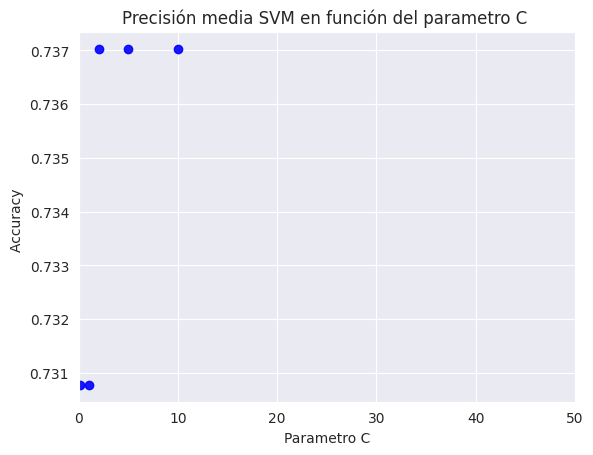

mean_fit_time  std_fit_time  mean_score_time  std_score_time  param_C  \
0       0.005647      0.000911         0.002624        0.000223      0.1   
1       0.006791      0.000487         0.002809        0.000698      1.0   
2       0.012754      0.009366         0.005088        0.007518      2.0   
3       0.012351      0.002042         0.002410        0.000204      5.0   
4       0.019091      0.003567         0.002577        0.000390     10.0   
5       0.137153      0.045865         0.004699        0.006344    100.0   

       params  split0_test_score  split1_test_score  split2_test_score  \
0  {'C': 0.1}           0.757576           0.666667           0.727273   
1    {'C': 1}           0.757576           0.666667           0.727273   
2    {'C': 2}           0.757576           0.666667           0.727273   
3    {'C': 5}           0.757576           0.666667           0.727273   
4   {'C': 10}           0.757576           0.666667           0.727273   
5  {'C': 100}           0.757576           0.666667           0.727273   

   split3_test_score  split4_test_score  split5_test_score  split6_test_score  \
0            0.65625            0.71875            0.65625            0.78125   
1            0.62500            0.71875            0.65625            0.81250   
2            0.65625            0.71875            0.65625            0.81250   
3            0.65625            0.71875            0.65625            0.81250   
4            0.65625            0.71875            0.65625            0.81250   
5            0.65625            0.71875            0.65625            0.81250   

   split7_test_score  split8_test_score  split9_test_score  mean_test_score  \
0            0.78125            0.81250               0.75         0.730777   
1            0.81250            0.78125               0.75         0.730777   
2            0.84375            0.78125               0.75         0.737027   
3            0.84375            0.78125               0.75         0.737027   
4            0.84375            0.78125               0.75         0.737027   
5            0.84375            0.78125               0.75         0.737027   

   std_test_score  rank_test_score  
0        0.053139                5  
1        0.061646                5  
2        0.061694                1  
3        0.061694                1  
4        0.061694                1  
5        0.061694                1

In [12]:

####################### busqueda parametrica

########################################
## CASO 1. BUSQUEDA CON KERNEL LINEAL
########################################

## busqueda de parametros para el caso lineal ###
from sklearn.model_selection import GridSearchCV

# definimos los rangos de los parametros
param_grid_lineal = {'C': [0.1, 1, 2, 5, 10, 100] }

grid = GridSearchCV(SVC(kernel='linear'), param_grid_lineal, refit = True, cv=10, verbose = 1)

# ENTRENAMOS EN TRAIN Y BUSCAMOS EN TRAIN
resultados = grid.fit(X_train, y_train)

####### visualizar los resultados para decidir si debemos seguir buscando.
# Crear gráfico de dispersión
import matplotlib.pyplot as plt
import numpy as np

aux=pd.DataFrame(resultados.cv_results_)

plt.scatter(aux[['param_C']], aux[['mean_test_score']], color='b', alpha=0.9)

plt.xlabel('Parametro C')
plt.ylabel('Accuracy ')
plt.xlim(0, 50)
# Añadir título al gráfico
plt.title('Precisión media SVM en función del parametro C ')

# Mostrar el gráfico
plt.show()

display(aux)

Fitting 10 folds for each of 5 candidates, totalling 50 fits


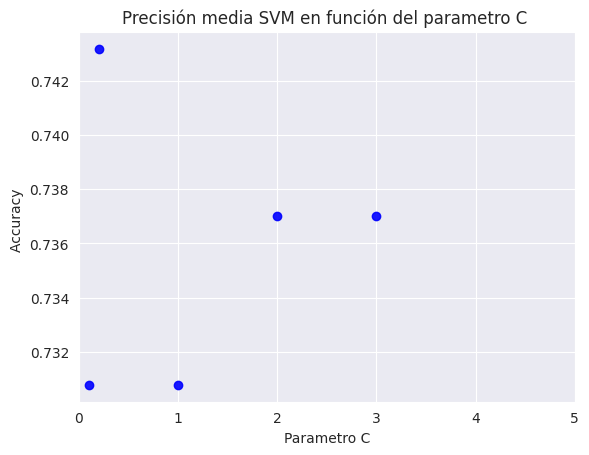

In [13]:

## busqueda de parametros para el caso lineal ###
from sklearn.model_selection import GridSearchCV

# definimos los rangos de los parametros
param_grid_lineal = {'C': [0.1, 0.2, 1, 2, 3] }

grid = GridSearchCV(SVC(kernel='linear'), param_grid_lineal, refit = True, cv=10, verbose = 1)

# ENTRENAMOS EN TRAIN Y BUSCAMOS EN TRAIN
resultados = grid.fit(X_train, y_train)

####### visualizar los resultados para decidir si debemos seguir buscando.
# Crear gráfico de dispersión
import matplotlib.pyplot as plt
import numpy as np

aux=pd.DataFrame(resultados.cv_results_)

plt.scatter(aux[['param_C']], aux[['mean_test_score']], color='b', alpha=0.9)

plt.xlabel('Parametro C')
plt.ylabel('Accuracy ')
plt.xlim(0, 5)
# Añadir título al gráfico
plt.title('Precisión media SVM en función del parametro C ')

# Mostrar el gráfico
plt.show()


Fitting 10 folds for each of 7 candidates, totalling 70 fits


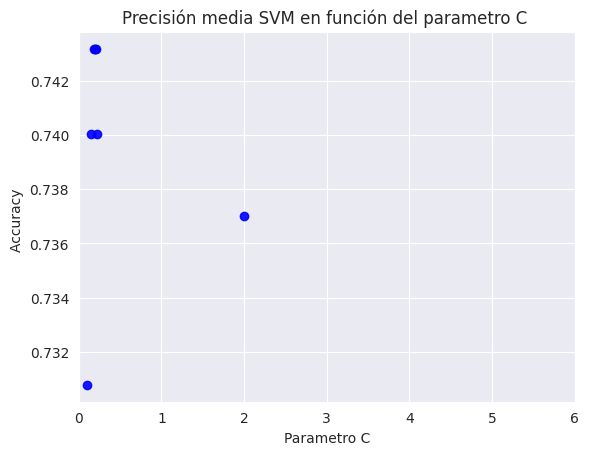

In [14]:

## busqueda de parametros para el caso lineal ###
from sklearn.model_selection import GridSearchCV

# definimos los rangos de los parametros
param_grid_lineal = {'C': [0.1, 0.15, 0.19, 0.2, 0.21, 0.22, 2] }
grid = GridSearchCV(SVC(kernel='linear'), param_grid_lineal, refit = True, cv=10, verbose = 1 )

# ENTRENAMOS EN TRAIN Y BUSCAMOS EN TRAIN
resultados = grid.fit(X_train, y_train)

####### visualizar los resultados para decidir si debemos seguir buscando.
# Crear gráfico de dispersión
import matplotlib.pyplot as plt
import numpy as np

aux=pd.DataFrame(resultados.cv_results_)

plt.scatter(aux[['param_C']], aux[['mean_test_score']], color='b', alpha=0.9)

plt.xlabel('Parametro C')
plt.ylabel('Accuracy ')
plt.xlim(0, 6)
# Añadir título al gráfico
plt.title('Precisión media SVM en función del parametro C ')

# Mostrar el gráfico
plt.show()

In [15]:


# print best parameter after tuning
print(grid.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)


{'C': 0.19}
SVC(C=0.19, kernel='linear')


In [ ]:

##############################################
### PREDECIMOS CON EL  MEJOR MODELO LINEAL ###
##############################################
grid_predictions = grid.predict(X_test)

# print classification report
print(classification_report(y_test, grid_predictions))

#### DIFERENCIAS ??? ## SE MEJORA

cm = confusion_matrix(y_test, grid_predictions)
print(cm)
accuracy=(cm[0,0]+cm[1,1])/(cm[0,1]+cm[1,1]+ cm[1,0]+cm[0,0])
print('accuracy' , accuracy)


              precision    recall  f1-score   support

           0       0.70      0.90      0.79        86
           1       0.69      0.38      0.49        53

    accuracy                           0.70       139
   macro avg       0.69      0.64      0.64       139
weighted avg       0.70      0.70      0.67       139

[[77  9]
 [33 20]]
accuracy 0.697841726618705


In [ ]:
# train the model on train set
model = SVC(kernel='linear', C=0.19)
model.fit(X_train, y_train)

##############################################
### PREDECIMOS CON EL  MEJOR MODELO LINEAL ###
##############################################
predictions = model.predict(X_test)

# print classification report
print(classification_report(y_test, predictions))

#### DIFERENCIAS ??? ## SE MEJORA

cm = confusion_matrix(y_test, predictions)
print(cm)
accuracy=(cm[0,0]+cm[1,1])/(cm[0,1]+cm[1,1]+ cm[1,0]+cm[0,0])
print('accuracy' , accuracy)


              precision    recall  f1-score   support

           0       0.70      0.90      0.79        86
           1       0.69      0.38      0.49        53

    accuracy                           0.70       139
   macro avg       0.69      0.64      0.64       139
weighted avg       0.70      0.70      0.67       139

[[77  9]
 [33 20]]
accuracy 0.697841726618705


Index(['sbp', 'tobacco', 'ldl', 'adiposity', 'typea', 'obesity', 'alcohol',
       'age', 'famhist_Present'],
      dtype='object')


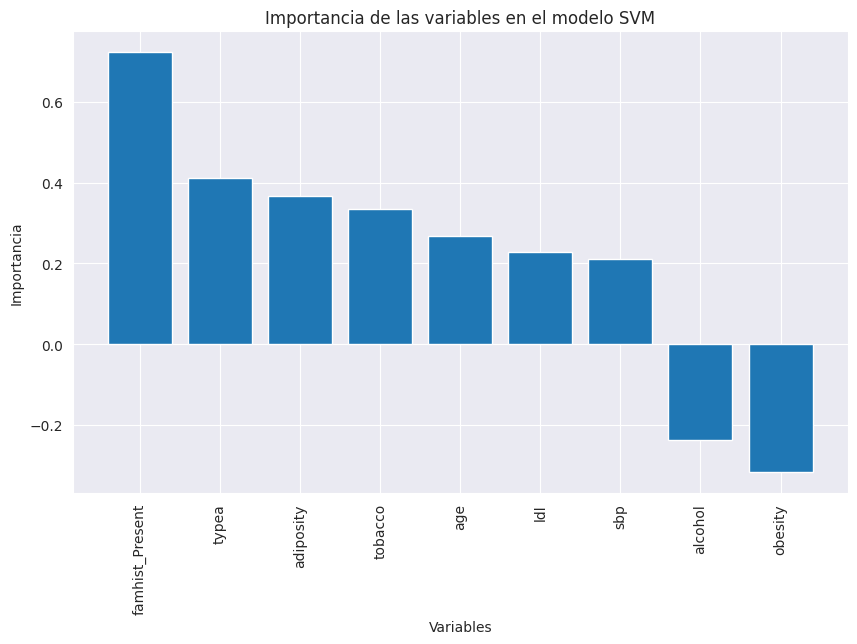

In [ ]:
coeficientes = model.coef_

import pandas as pd
import matplotlib.pyplot as plt

nombres_variables = X_train.columns
print(nombres_variables)
importancia_variables = pd.DataFrame({'Variable': nombres_variables, 'Importancia': coeficientes[0]})
importancia_variables = importancia_variables.sort_values('Importancia', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(importancia_variables['Variable'], importancia_variables['Importancia'])
plt.xticks(rotation=90)
plt.xlabel('Variables')
plt.ylabel('Importancia')
plt.title('Importancia de las variables en el modelo SVM')
plt.show()

              precision    recall  f1-score   support

           0       0.72      0.93      0.81        86
           1       0.79      0.42      0.54        53

    accuracy                           0.73       139
   macro avg       0.75      0.67      0.68       139
weighted avg       0.75      0.73      0.71       139

[[80  6]
 [31 22]]
accuracy 0.7338129496402878
Index(['sbp', 'tobacco', 'ldl', 'adiposity', 'typea', 'age',
       'famhist_Present'],
      dtype='object')


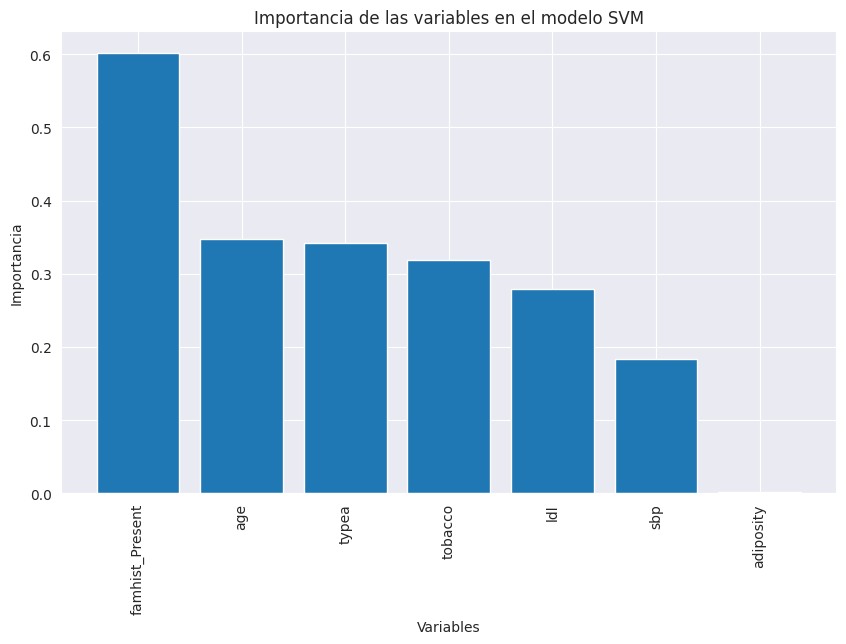

In [ ]:
## si entendemos lo que pasa vemos que algo raro pasa con alcohol y obesidad.....

X = df_depurada_dummies.drop(['chd', 'alcohol', 'obesity'], axis=1)
y = df_depurada_dummies["chd"]

[X_train, X_test, y_train, y_test] = train_test_split(X, y, test_size = 0.30, random_state = 101)


# train the model on train set
model = SVC(kernel='linear', C=0.19)
model.fit(X_train, y_train)

# print prediction results
predictions = model.predict(X_test)
print(classification_report(y_test, predictions))

cm = confusion_matrix(y_test, predictions)
print(cm)
accuracy=(cm[0,0]+cm[1,1])/(cm[0,1]+cm[1,1]+ cm[1,0]+cm[0,0])
print('accuracy' , accuracy)

coeficientes = model.coef_

nombres_variables = X_train.columns
print(nombres_variables)
importancia_variables = pd.DataFrame({'Variable': nombres_variables, 'Importancia': coeficientes[0]})
importancia_variables = importancia_variables.sort_values('Importancia', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(importancia_variables['Variable'], importancia_variables['Importancia'])
plt.xticks(rotation=90)
plt.xlabel('Variables')
plt.ylabel('Importancia')
plt.title('Importancia de las variables en el modelo SVM')
plt.show()

Fitting 5 folds for each of 30 candidates, totalling 150 fits
{'C': 5, 'gamma': 0.1, 'kernel': 'rbf'}
SVC(C=5, gamma=0.1)
Media en el óptimo: 0.7153846153846154


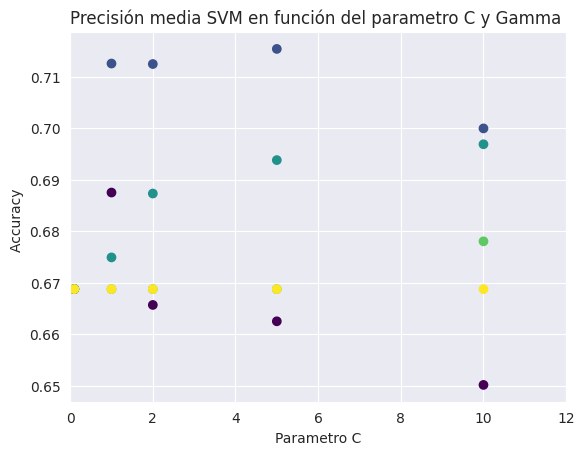

In [ ]:
### Cambiamos el kernel ###
########################################
## CASO 2. BUSQUEDA CON KERNEL GAUSIANO
########################################

param_grid_gausiano = {'C': [0.1, 1, 2, 5, 10, 100],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

grid_gausiano = GridSearchCV(SVC(), param_grid_gausiano, refit = True, cv=5, verbose = 1)

# fitting the model for grid search
resultados = grid_gausiano.fit(X_train, y_train)

print(grid_gausiano.best_params_)

print(grid_gausiano.best_estimator_)

media_optimo = grid_gausiano.best_score_
print(f"Media en el óptimo: {media_optimo}")

############################################
#### visualizamos los resultados  GAUSIANO
##############################################
aux = pd.DataFrame(resultados.cv_results_)

# discretizar la variable sigma en 5 categorías

# factorizar la variable sigma
categorias, valores_enteros = pd.factorize(aux['param_gamma'])


# crear el gráfico de dispersión con colores basados en las categorías de sigma


plt.scatter(aux[['param_C']], aux[['mean_test_score']], c=categorias , cmap='viridis')
plt.xlabel('Parametro C')
plt.ylabel('Accuracy ')
plt.xlim(0, 12)
# Añadir título al gráfico
plt.title('Precisión media SVM en función del parametro C y Gamma ')
plt.show()

#display(aux)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
{'C': 4, 'gamma': 0.1, 'kernel': 'rbf'}
SVC(C=4, gamma=0.1)
Media en el óptimo: 0.7215865384615385


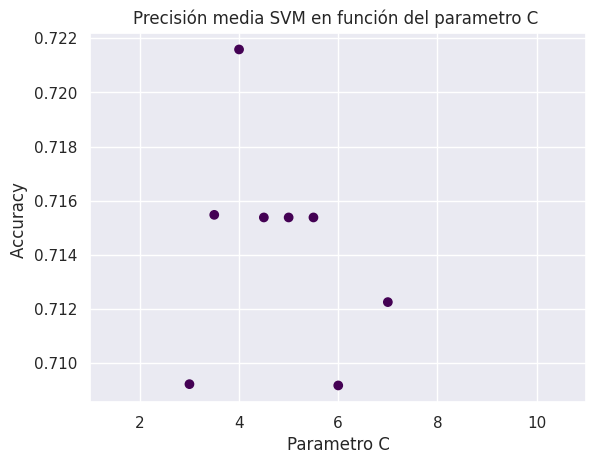

In [ ]:
########################################
## CASO 2. BUSQUEDA CON KERNEL GAUSIANO
########################################

param_grid_gausiano = {'C': [3,3.5, 4, 4.5, 5, 5.5, 6, 7],
              'gamma': [0.1],
              'kernel': ['rbf']}

grid_gausiano = GridSearchCV(SVC(), param_grid_gausiano, refit = True, cv=5, verbose = 1)

#  # Para optimizar la puntuación F1:
#grid_gausiano = GridSearchCV(SVC(), param_grid_gausiano, scoring='f1', refit=True, cv=5, verbose=1)

# fitting the model for grid search
resultados = grid_gausiano.fit(X_train, y_train)

print(grid_gausiano.best_params_)

print(grid_gausiano.best_estimator_)

media_optimo = grid_gausiano.best_score_
print(f"Media en el óptimo: {media_optimo}")

############################################
#### visualizamos los resultados  GAUSIANO
##############################################
aux = pd.DataFrame(resultados.cv_results_)

# discretizar la variable sigma en 5 categorías

# factorizar la variable sigma
categorias, valores_enteros = pd.factorize(aux['param_gamma'])


# crear el gráfico de dispersión con colores basados en las categorías de sigma


plt.scatter(aux[['param_C']], aux[['mean_test_score']], c=categorias , cmap='viridis')
plt.xlabel('Parametro C')
plt.ylabel('Accuracy ')
plt.xlim(1,11 )
# Añadir título al gráfico
plt.title('Precisión media SVM en función del parametro C ')

plt.show()


              precision    recall  f1-score   support

           0       0.70      0.85      0.77        86
           1       0.63      0.42      0.50        53

    accuracy                           0.68       139
   macro avg       0.67      0.63      0.63       139
weighted avg       0.67      0.68      0.67       139

[[73 13]
 [31 22]]
accuracy 0.6834532374100719


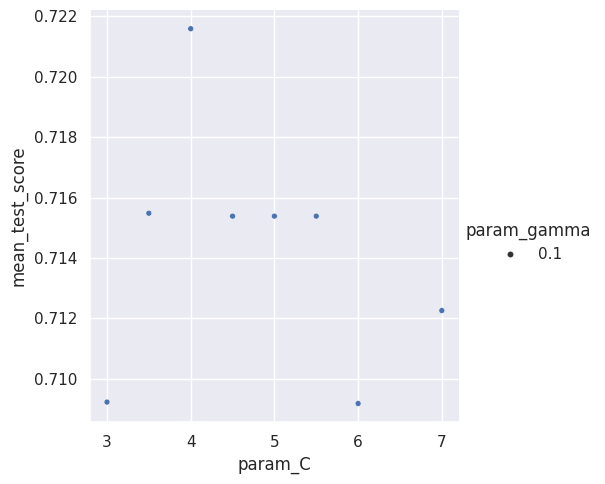

In [ ]:

#######################otra posibilidad para hacer el grafico mas sencillo ##

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")


sns.relplot(x="param_C", y="mean_test_score",  size='param_gamma' ,  data=aux);

##############################################
### PREDECIMOS CON EL  MEJOR MODELO GAUSIANO ENCONTRADO ###
##############################################
grid_predictions = grid_gausiano.predict(X_test)

# print classification report
print(classification_report(y_test, grid_predictions))

#### DIFERENCIAS ??? ## SE MEJORA

cm = confusion_matrix(y_test, grid_predictions)
print(cm)
accuracy=(cm[0,0]+cm[1,1])/(cm[0,1]+cm[1,1]+ cm[1,0]+cm[0,0])
print('accuracy' , accuracy)



In [ ]:
##############################################
### PREDECIMOS CON EL  MEJOR MODELO GAUSIANO ###
##############################################
grid_predictions = grid_gausiano.predict(X_test)

# print classification report
print(classification_report(y_test, grid_predictions))

#### DIFERENCIAS ??? ## SE MEJORA

cm = confusion_matrix(y_test, grid_predictions)
print(cm)
accuracy=(cm[0,0]+cm[1,1])/(cm[0,1]+cm[1,1]+ cm[1,0]+cm[0,0])
print('accuracy' , accuracy)


              precision    recall  f1-score   support

           0       0.70      0.85      0.77        86
           1       0.63      0.42      0.50        53

    accuracy                           0.68       139
   macro avg       0.67      0.63      0.63       139
weighted avg       0.67      0.68      0.67       139

[[73 13]
 [31 22]]
accuracy 0.6834532374100719


In [ ]:
# train the model on train set
model = SVC(kernel='rbf', C=4, gamma=0.1 )
model.fit(X_train, y_train)

##############################################
### PREDECIMOS CON EL  MEJOR MODELO LINEAL ###
##############################################
predictions = model.predict(X_train)

# print classification report
print(classification_report(y_train, predictions))

#### DIFERENCIAS ??? ## SE MEJORA

cm = confusion_matrix(y_train, predictions)
print(cm)
accuracy=(cm[0,0]+cm[1,1])/(cm[0,1]+cm[1,1]+ cm[1,0]+cm[0,0])
print('accuracy en train' , accuracy)



predictions = model.predict(X_test)

# print classification report
print(classification_report(y_test, predictions))

#### DIFERENCIAS ??? ## SE MEJORA

cm = confusion_matrix(y_test, predictions)
print(cm)
accuracy=(cm[0,0]+cm[1,1])/(cm[0,1]+cm[1,1]+ cm[1,0]+cm[0,0])
print('accuracy' , accuracy)


              precision    recall  f1-score   support

           0       0.82      0.92      0.87       216
           1       0.78      0.61      0.68       107

    accuracy                           0.81       323
   macro avg       0.80      0.76      0.78       323
weighted avg       0.81      0.81      0.81       323

[[198  18]
 [ 42  65]]
accuracy en train 0.8142414860681114
              precision    recall  f1-score   support

           0       0.70      0.85      0.77        86
           1       0.63      0.42      0.50        53

    accuracy                           0.68       139
   macro avg       0.67      0.63      0.63       139
weighted avg       0.67      0.68      0.67       139

[[73 13]
 [31 22]]
accuracy 0.6834532374100719


Fitting 5 folds for each of 32 candidates, totalling 160 fits
{'C': 7, 'gamma': 0.1, 'kernel': 'rbf'}
SVC(C=7, gamma=0.1)
Media en el óptimo: 0.5223363286264442


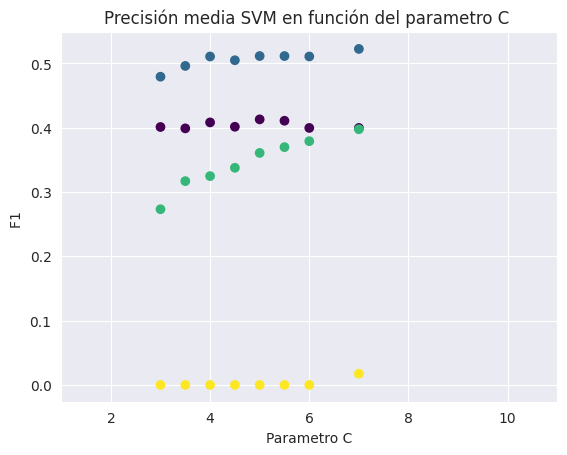

In [ ]:

param_grid_gausiano = {'C': [3,3.5, 4, 4.5, 5, 5.5, 6, 7],
              'gamma': [1, 0.1, 0.01, 0.001],
              'kernel': ['rbf']}

#grid_gausiano = GridSearchCV(SVC(), param_grid_gausiano, refit = True, cv=5, verbose = 1)

#  # Para optimizar la puntuación F1:
grid_gausiano = GridSearchCV(SVC(), param_grid_gausiano, scoring='f1', refit=True, cv=5, verbose=1)

# fitting the model for grid search
resultados = grid_gausiano.fit(X_train, y_train)

print(grid_gausiano.best_params_)

print(grid_gausiano.best_estimator_)

media_optimo = grid_gausiano.best_score_
print(f"Media en el óptimo: {media_optimo}")

############################################
#### visualizamos los resultados  GAUSIANO
##############################################
aux = pd.DataFrame(resultados.cv_results_)

# discretizar la variable sigma en 5 categorías

# factorizar la variable sigma
categorias, valores_enteros = pd.factorize(aux['param_gamma'])


# crear el gráfico de dispersión con colores basados en las categorías de sigma


plt.scatter(aux[['param_C']], aux[['mean_test_score']], c=categorias , cmap='viridis')
plt.xlabel('Parametro C')
plt.ylabel('F1 ')
plt.xlim(1,11 )
# Añadir título al gráfico
plt.title('Precisión media SVM en función del parametro C ')

plt.show()


Fitting 5 folds for each of 40 candidates, totalling 200 fits
{'C': 7, 'gamma': 0.1, 'kernel': 'rbf'}
SVC(C=7, gamma=0.1)
Media en el óptimo: 0.4774891774891774


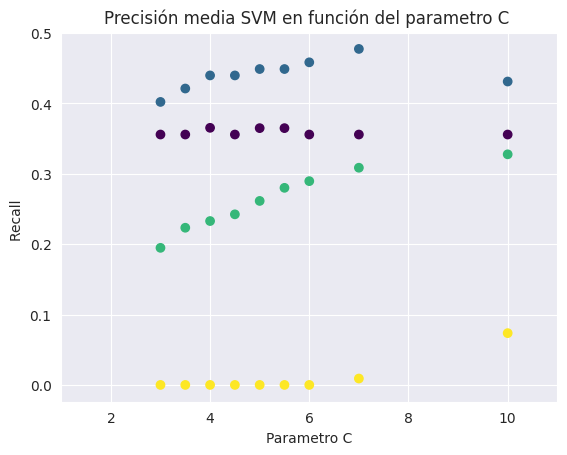

In [ ]:
param_grid_gausiano = {'C': [3,3.5, 4, 4.5, 5, 5.5, 6, 7,10,15],
              'gamma': [1, 0.1, 0.01, 0.001],
              'kernel': ['rbf']}

#grid_gausiano = GridSearchCV(SVC(), param_grid_gausiano, refit = True, cv=5, verbose = 1)

#  # Para optimizar la puntuación F1:
grid_gausiano = GridSearchCV(SVC(), param_grid_gausiano, scoring='recall', refit=True, cv=5, verbose=1)

# fitting the model for grid search
resultados = grid_gausiano.fit(X_train, y_train)

print(grid_gausiano.best_params_)

print(grid_gausiano.best_estimator_)

media_optimo = grid_gausiano.best_score_
print(f"Media en el óptimo: {media_optimo}")

############################################
#### visualizamos los resultados  GAUSIANO
##############################################
aux = pd.DataFrame(resultados.cv_results_)

# discretizar la variable sigma en 5 categorías

# factorizar la variable sigma
categorias, valores_enteros = pd.factorize(aux['param_gamma'])


# crear el gráfico de dispersión con colores basados en las categorías de sigma


plt.scatter(aux[['param_C']], aux[['mean_test_score']], c=categorias , cmap='viridis')
plt.xlabel('Parametro C')
plt.ylabel('Recall ')
plt.xlim(1,11 )
# Añadir título al gráfico
plt.title('Precisión media SVM en función del parametro C ')

plt.show()


In [ ]:
# train the model on train set
model = SVC(kernel='rbf', C=7, gamma=0.1 )
model.fit(X_train, y_train)

##############################################
### PREDECIMOS CON EL  MEJOR MODELO LINEAL ###
##############################################
predictions = model.predict(X_train)

# print classification report
print(classification_report(y_train, predictions))

#### DIFERENCIAS ??? ## SE MEJORA

cm = confusion_matrix(y_train, predictions)
print(cm)
accuracy=(cm[0,0]+cm[1,1])/(cm[0,1]+cm[1,1]+ cm[1,0]+cm[0,0])
print('accuracy en train' , accuracy)



predictions = model.predict(X_test)

# print classification report
print(classification_report(y_test, predictions))

#### DIFERENCIAS ??? ## SE MEJORA

cm = confusion_matrix(y_test, predictions)
print(cm)
accuracy=(cm[0,0]+cm[1,1])/(cm[0,1]+cm[1,1]+ cm[1,0]+cm[0,0])
print('accuracy' , accuracy)


              precision    recall  f1-score   support

           0       0.84      0.93      0.88       216
           1       0.81      0.64      0.71       107

    accuracy                           0.83       323
   macro avg       0.82      0.78      0.80       323
weighted avg       0.83      0.83      0.82       323

[[200  16]
 [ 39  68]]
accuracy en train 0.8297213622291022
              precision    recall  f1-score   support

           0       0.71      0.84      0.77        86
           1       0.62      0.43      0.51        53

    accuracy                           0.68       139
   macro avg       0.66      0.64      0.64       139
weighted avg       0.67      0.68      0.67       139

[[72 14]
 [30 23]]
accuracy 0.6834532374100719


Fitting 5 folds for each of 60 candidates, totalling 300 fits
{'C': 7, 'gamma': 0.1, 'kernel': 'rbf'}
SVC(C=7, gamma=0.1)
Media en el óptimo: 1.3014998726763434


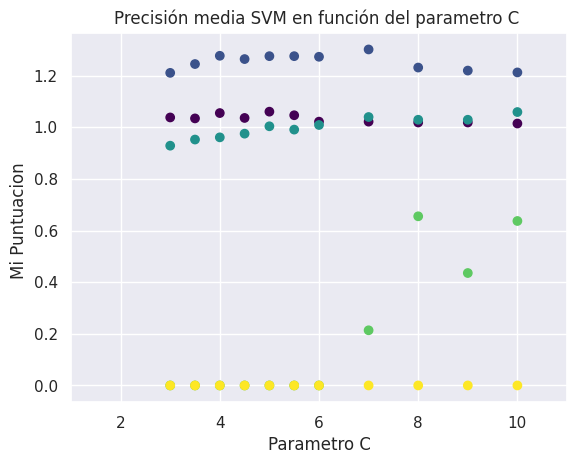

In [ ]:
from sklearn.metrics import precision_score, recall_score, make_scorer

def mi_funcion_de_puntuacion(y_true, y_pred):
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    return 2 * recall + precision  # Recall con doble importancia

mi_scorer = make_scorer(mi_funcion_de_puntuacion, greater_is_better=True)

param_grid_gausiano = {'C': [3,3.5, 4, 4.5, 5, 5.5, 6, 7,8,9,10,15],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

#grid_gausiano = GridSearchCV(SVC(), param_grid_gausiano, refit = True, cv=5, verbose = 1)

#  # Para optimizar la puntuación F1:
grid_gausiano = GridSearchCV(SVC(), param_grid_gausiano, scoring=mi_scorer, refit=True, cv=5, verbose=1)



# fitting the model for grid search
resultados = grid_gausiano.fit(X_train, y_train)

print(grid_gausiano.best_params_)

print(grid_gausiano.best_estimator_)

media_optimo = grid_gausiano.best_score_
print(f"Media en el óptimo: {media_optimo}")

############################################
#### visualizamos los resultados  GAUSIANO
##############################################
aux = pd.DataFrame(resultados.cv_results_)

# discretizar la variable sigma en 5 categorías

# factorizar la variable sigma
categorias, valores_enteros = pd.factorize(aux['param_gamma'])


# crear el gráfico de dispersión con colores basados en las categorías de sigma


plt.scatter(aux[['param_C']], aux[['mean_test_score']], c=categorias , cmap='viridis')
plt.xlabel('Parametro C')
plt.ylabel('Mi Puntuacion ')
plt.xlim(1,11 )
# Añadir título al gráfico
plt.title('Precisión media SVM en función del parametro C ')

plt.show()

Fitting 5 folds for each of 42 candidates, totalling 210 fits
{'C': 1, 'coef0': 0, 'degree': 2, 'kernel': 'poly'}
SVC(C=1, coef0=0, degree=2, kernel='poly')
Media en el óptimo: 0.7338461538461538


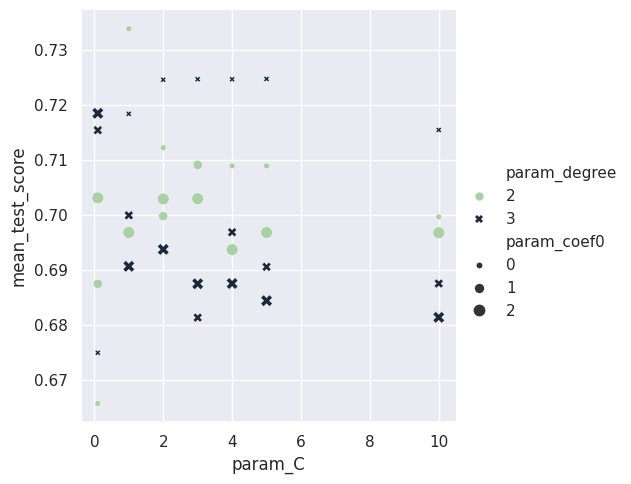

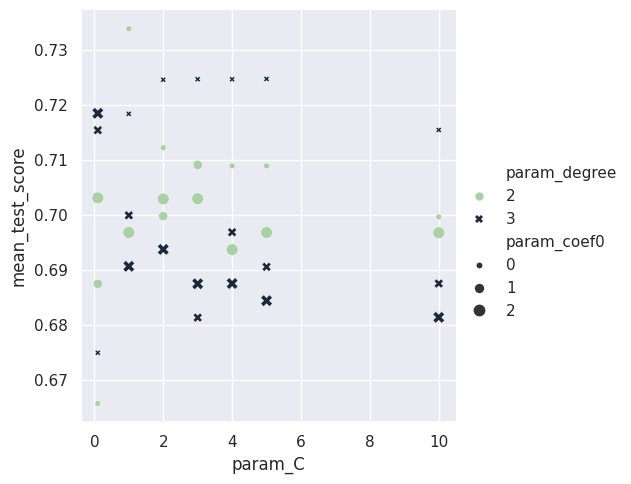

In [ ]:

###################################################
########################## MODELO POLINOMIAL SVM
##################################################


param_grid_poli = {'C': [0.1, 1, 2 ,3, 4,  5, 10], 'degree': [2, 3],
                   'coef0': [0, 1, 2], 'kernel': ['poly']}

grid_poli = GridSearchCV(SVC(), param_grid_poli, refit = True, cv=5, verbose = 1)


resultados = grid_poli.fit(X_train, y_train)
aux= pd.DataFrame(resultados.cv_results_)

######### visualizamos los resultados ###

sns.relplot(x="param_C", y="mean_test_score", palette="ch:r=-.5,l=.75", hue="param_degree", size="param_coef0", style='param_degree',  data=aux);

## se puede probar tambien col (interesante)
print(grid_poli.best_params_)

print(grid_poli.best_estimator_)


media_optimo = grid_poli.best_score_
print(f"Media en el óptimo: {media_optimo}")


############################################
#### visualizamos los resultados  POlINOMIAL
##############################################
aux = pd.DataFrame(resultados.cv_results_)


######### visualizamos los resultados ###

sns.relplot(x="param_C", y="mean_test_score", palette="ch:r=-.5,l=.75", hue="param_degree", size="param_coef0", style='param_degree',  data=aux);




Fitting 5 folds for each of 27 candidates, totalling 135 fits
{'C': 1, 'coef0': 0, 'degree': 2, 'kernel': 'poly'}
SVC(C=1, coef0=0, degree=2, kernel='poly')
Media en el óptimo: 0.7338461538461538


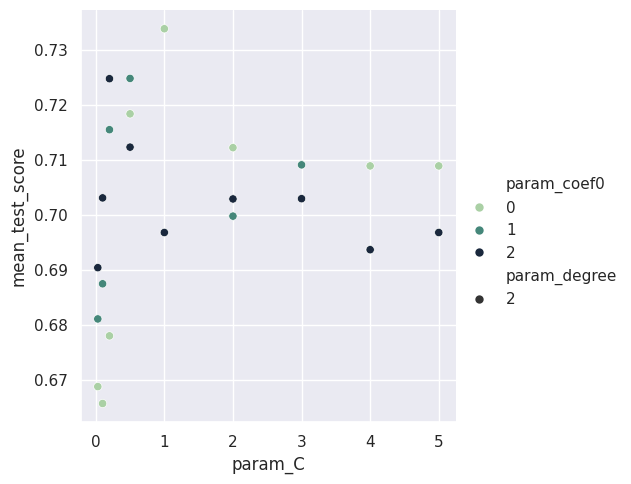

In [ ]:

###################################################
########################## MODELO POLINOMIAL SVM
##################################################


param_grid_poli = {'C': [0.1, 0.2,.03, 0.5, 1, 2 ,3, 4,  5], 'degree': [2],
                   'coef0': [0, 1, 2], 'kernel': ['poly']}

grid_poli = GridSearchCV(SVC(), param_grid_poli, refit = True, cv=5, verbose = 1)


resultados = grid_poli.fit(X_train, y_train)
aux= pd.DataFrame(resultados.cv_results_)

######### visualizamos los resultados ###

sns.relplot(x="param_C", y="mean_test_score", palette="ch:r=-.5,l=.75", hue="param_coef0", style='param_degree',  data=aux);

## se puede probar tambien col (interesante)
print(grid_poli.best_params_)

print(grid_poli.best_estimator_)

media_optimo = grid_poli.best_score_
print(f"Media en el óptimo: {media_optimo}")





Fitting 5 folds for each of 24 candidates, totalling 120 fits
{'C': 1, 'coef0': 0, 'degree': 2, 'kernel': 'poly'}
SVC(C=1, coef0=0, degree=2, kernel='poly')
Media en el óptimo: 0.7338461538461538


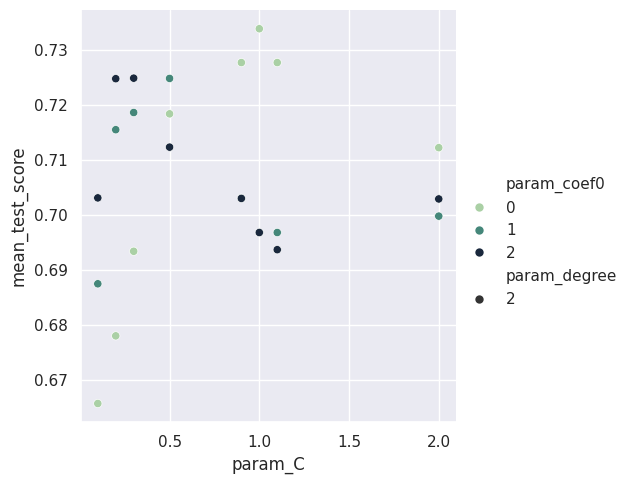

In [ ]:
###################################################
########################## MODELO POLINOMIAL SVM
##################################################


param_grid_poli = {'C': [0.1, 0.2, 0.3, 0.5, 0.9, 1, 1.1, 2 ], 'degree': [2],
                   'coef0': [0, 1, 2], 'kernel': ['poly']}

grid_poli = GridSearchCV(SVC(), param_grid_poli, refit = True, cv=5, verbose = 1)


resultados = grid_poli.fit(X_train, y_train)
aux= pd.DataFrame(resultados.cv_results_)

######### visualizamos los resultados ###

sns.relplot(x="param_C", y="mean_test_score", palette="ch:r=-.5,l=.75", hue="param_coef0", style='param_degree',  data=aux);

## se puede probar tambien col (interesante)
print(grid_poli.best_params_)

print(grid_poli.best_estimator_)

media_optimo = grid_poli.best_score_
print(f"Media en el óptimo: {media_optimo}")

In [ ]:
##############################################
### PREDECIMOS CON EL  MEJOR MODELO POLINOMIAL ###
##############################################
grid_predictions = grid_poli.predict(X_test)

# print classification report
print(classification_report(y_test, grid_predictions))

#### DIFERENCIAS ??? ## SE MEJORA

cm = confusion_matrix(y_test, grid_predictions)
print(cm)
accuracy=(cm[0,0]+cm[1,1])/(cm[0,1]+cm[1,1]+ cm[1,0]+cm[0,0])
print('accuracy' , accuracy)

              precision    recall  f1-score   support

           0       0.71      0.92      0.80        86
           1       0.74      0.38      0.50        53

    accuracy                           0.71       139
   macro avg       0.72      0.65      0.65       139
weighted avg       0.72      0.71      0.68       139

[[79  7]
 [33 20]]
accuracy 0.7122302158273381


In [ ]:
from sklearn.inspection import permutation_importance

# Ajustar el modelo con los mejores parámetros
best_model = grid_poli.best_estimator_
best_model.fit(X_train, y_train)

# Calcular la importancia de permutación
result = permutation_importance(
    best_model, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1
)

# Mostrar la importancia de cada variable
for i in result.importances_mean.argsort()[::-1]:
    print(
        f"{X_train.columns[i]:<8} "
        f"{result.importances_mean[i]:.3f}"
        f" +/- {result.importances_std[i]:.3f}"
    )

ldl      0.041 +/- 0.019
famhist_Present 0.034 +/- 0.010
tobacco  0.024 +/- 0.020
age      0.017 +/- 0.017
typea    0.006 +/- 0.006
adiposity 0.001 +/- 0.009
sbp      -0.003 +/- 0.011


In [ ]:
!pip install shap

  0%|          | 0/139 [00:00<?, ?it/s]

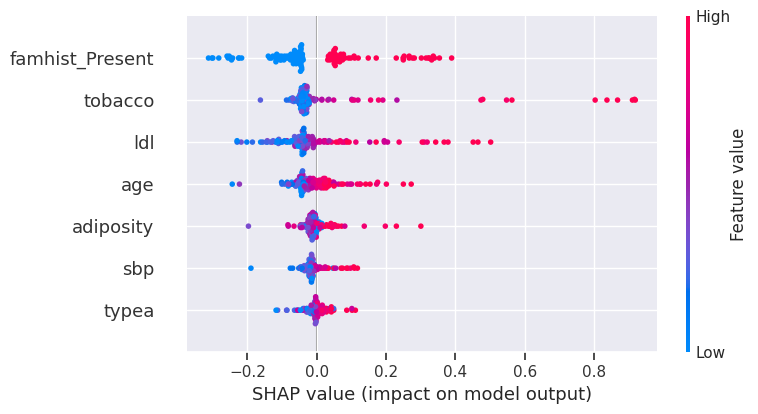

In [ ]:
import shap
explainer = shap.KernelExplainer(best_model.predict, X_train)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test)

